In [4]:
run -i profit_optimization_core.py

Run scenario:  sssd
Run solver type closed_form
Ex ante customer 1 IR should be nonneg for support_v[1]: 1.75
ERROR term1 ub and lb are very close.
term1 0 term1 -0.0002943289780511148 denominator 0.823529411765
ERROR term1 ub and lb are very close.
term1 0 term1 -0.0002943289780511148 denominator 0.823529411765
ERROR term1 ub and lb are very close.
term1 0 term1 -0.0002943289780511148 denominator 0.823529411765
customer_j 2 active_customer_idxes [1]
customer  1 : sd 2.5 delta_bar 0.3 k_delta_bar 0.85 wo_j 0 w_j 0.452952303175
customer  2 : sd 2.33238075794 delta_bar 0.3 k_delta_bar 0.85 wo_j 0 w_j 0
t_j 1 temp_route None
Incremental profit for j: 0.478332074823 prices {'p_x': 1.2828094168659658, 'p_s': 1.0480595597551108}
ERROR term1 ub and lb are very close.
term1 0 term1 -0.0002943289780511148 denominator 0.823529411765
prbx,probp,incrpex,incpp,expp 0.329012194051 0.142338595234 1.04957134107 0.934464084492 0.000357399469008
scaled: p_x 0.55 p_s 0.449351829108
OrderedDict([(1, {'s':

AssertionError: 

In [6]:
# import matplotlib.pyplot as plt
# plt.matshow(incremental_profit_j_surface)
# from matplotlib.pyplot import imshow, pcolor
# pcolor(incremental_profit_j_surface)
# import pandas as pd
# temp1 = incremental_profit_j_surface
# temp = pd.DataFrame(data=temp1)    
# temp.to_csv('uselessincrp.csv', sep=',', encoding='utf-8')

/home/theja/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


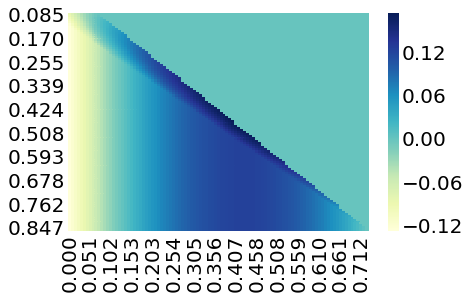

In [9]:
import pandas as pd
customer_j = len(customers)
k_delta_bar = customers[customer_j]['k_delta_bar']
c_op =	params['c_op']
p_x_max =	params['p_x_max_per_mile']*customers[customer_j]['sd']
gridsearch_num = params['gridsearch_num']
px_lb = c_op*customers[customer_j]['sd']
px_ub = p_x_max
ps_lb = 0
ps_ub = k_delta_bar*px_ub
px_gridvals = np.linspace(px_lb,px_ub,num=gridsearch_num)
ps_gridvals = np.linspace(ps_lb,ps_ub,num=gridsearch_num)

temp1 = incremental_profit_j_surface
temp1b = pd.DataFrame(data=temp1,index=['%.3f'%(x) for x in px_gridvals],columns=['%.3f'%(x) for x  in ps_gridvals])
ax = sns.heatmap(temp1b, cmap="YlGnBu")#,vmin=-.2,vmax=.9)
fig = ax.get_figure()
fig.show()

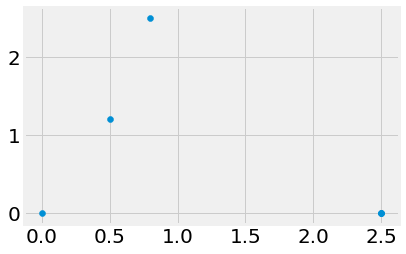

In [2]:
#customer locations
import numpy as np
import matplotlib.pyplot as plt
x = []
y = []
for idx in customers:
    x.append(customers[idx]['s'][0])
    y.append(customers[idx]['s'][1])
    x.append(customers[idx]['d'][0])
    y.append(customers[idx]['d'][1])
plt.scatter(x, y)
plt.show()

In [17]:
p_x_candidate = phi_v_inv(params['c_op'],params['support_v'])
print(p_x_candidate)

0.55


In [18]:
k_bar = params['k_bar']
support_v = params['support_v']
degradation_multiplier = params['degradation_multiplier']
EEPP_coeff = params['EEPP_coeff']
t_j = 1
profit = get_incremental_profit_adding_j([p_x_candidate,k_delta_bar*p_x_candidate],
                                         customers,c_op,support_v,
                                         degradation_multiplier,EEPP_coeff,t_j,k_bar)
print(profit)
(prob_exclusive_val,prob_pool_val,
 incr_profit_exclusive_val,incr_profit_pool_val,
 expost_penalty_sum) = get_incremental_profit_adding_j_components([p_x_candidate,k_delta_bar*p_x_candidate],
                                                                  customers,c_op,support_v,
                                                                  degradation_multiplier,EEPP_coeff,t_j,k_bar)
print('prbx,probp,incrpex,incpp,expp',prob_exclusive_val,prob_pool_val,incr_profit_exclusive_val,incr_profit_pool_val,expost_penalty_sum)

0.165510492279
prbx,probp,incrpex,incpp,expp 0.356273690421 0 0.464559962547 0.340180215346 0.000675351629805


In [13]:

print(get_incremental_profit_adding_j([0.4699202059924642,0.39943217509359458],
                                         customers,c_op,support_v,
                                         degradation_multiplier,EEPP_coeff,t_j,k_bar))

0.173016075843


In [14]:
0.4699202059924642*.85

0.3994321750935946

In [15]:
.45*0.384480168539

0.17301607584255002

In [20]:
phi(c_op,support_v)

-0.8